In [1]:
import cv2
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
from keras.datasets import cifar10
import matplotlib.pyplot as plt


Чтобы сильно не заморачиваться загрузим данные с Keras

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Кратко пробежимся по данным

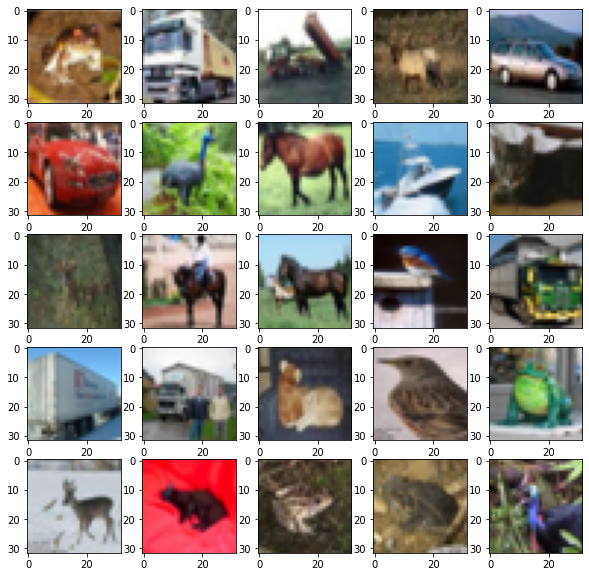

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])

Возможное псевдорешение

Text(0.5, 1.0, 'После обработки')

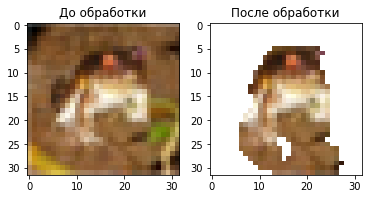

In [4]:
segmentor = SelfiSegmentation()
img_Out = segmentor.removeBG(X_train[0], (255,255,255), threshold=0.99)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(X_train[0])
axes[0].set_title("До обработки")
axes[1].imshow(img_Out)
axes[1].set_title("После обработки")


Худший вариант из всех, библиотека rembg показывает лучшие результаты

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Посмотрим на полученные изображения

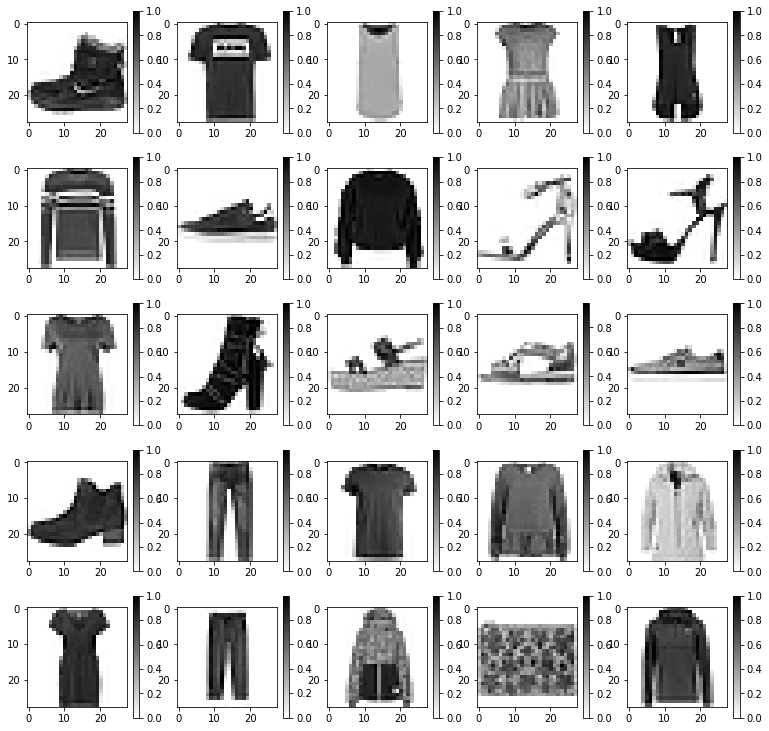

In [7]:
X_train = X_train / 255
X_test = X_test / 255
plt.figure(figsize=(13,13))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    


In [12]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=(28,28,1)),
keras.layers.Dense(128,activation='relu'),
keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer=tensorflow.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,epochs=26)

Epoch 1/26
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7464 - accuracy: 0.7610
Epoch 2/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5162 - accuracy: 0.8269
Epoch 3/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4685 - accuracy: 0.8400
Epoch 4/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4408 - accuracy: 0.8481
Epoch 5/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4223 - accuracy: 0.8553
Epoch 6/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4078 - accuracy: 0.8588
Epoch 7/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3964 - accuracy: 0.8625
Epoch 8/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3866 - accuracy: 0.8669
Epoch 9/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3769 - accuracy: 0.8686
Epoch 10/26
1875/1875 [==============================] - 4s 2ms/step - loss: 0.369

In [17]:
prediction = model.predict(X_train)
np.argmax(prediction[0])

9

In [18]:
y_train[0]

9

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Точность на тестовом наборе данных: ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8738
Точность на тестовом наборе данных:  0.8737999796867371
